<a href="https://colab.research.google.com/github/EnockCity/personal_projects/blob/master/Gross_Capital_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analytical Model Overview**

This analytical model is designed to explore the relationship between Gross Capital Formation, which serves as the response variable, and a set of predictor variables: Real Interest Rate, Domestic Savings, Government Expenditure, and Labour Force. Understanding how these economic factors influence Gross Capital Formation is crucial for formulating effective fiscal and monetary policies.

Model Selection

For this analysis, Ridge Regression was chosen as the primary statistical tool. Ridge Regression is particularly suitable for this study due to its ability to handle multicollinearity—where predictor variables are highly correlated. This method not only improves the stability and accuracy of the regression coefficients but also introduces a penalty term that shrinks the coefficients, mitigating the problem of overfitting commonly associated with standard linear regression in scenarios involving correlated inputs.

Implementation Details

The model is implemented using a robust dataset spanning several years (1970-2022), capturing the dynamic interactions between the predictor variables and Gross Capital Formation. The dataset has been meticulously preprocessed to ensure quality and consistency, with missing values addressed and data normalized to enhance the effectiveness of the Ridge Regression analysis.

Insights and Applications

The model has achieved an impressive R-squared value of 96%, indicating that 96 percent of the variability in Gross Capital Formation can be explained by the variations in the Real Interest Rate, Domestic Savings, Government Expenditure, and Labour Force. This high degree of model accuracy underscores the strong predictive power of the regression, providing policymakers and economic strategists with reliable insights.

Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/Analytical_Model_Final.csv')

In [ ]:
df = df.round(2)


In [ ]:
# Display the first few rows of the dataframe
df.head()

,Year,Real_Interest_Rate,Domestic_Savings,Government_Expenditure,Labour_Force,Gross_Capital_Formation
0,1970,6.22,23.56,100.84,4474936.82,24.40
1,1971,20.07,17.37,106.55,4624592.64,23.92
2,1972,7.70,20.20,102.12,4779253.43,22.32
3,1973,-1.09,24.54,101.28,4939086.55,25.81
4,1974,-5.64,18.53,107.22,5104265.00,25.76


In [ ]:
df.isnull().sum()

Year                       0
Real_Interest_Rate         0
Domestic_Savings           0
Government_Expenditure     0
Labour_Force               0
Gross_Capital_Formation    0
dtype: int64

In [ ]:
# Display basic info to understand data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     53 non-null     int64  
 1   Real_Interest_Rate       53 non-null     float64
 2   Domestic_Savings         53 non-null     float64
 3   Government_Expenditure   53 non-null     float64
 4   Labour_Force             53 non-null     float64
 5   Gross_Capital_Formation  53 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.6 KB


In [ ]:
# Display the summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,53.0,1.996000e+03,1.544345e+01,1970.00,1983.00,1996.00,2009.00,2022.00
Real_Interest_Rate,53.0,6.223019e+00,7.174777e+00,-10.10,3.41,6.27,9.29,21.10
Domestic_Savings,53.0,1.445906e+01,6.004023e+00,4.31,10.41,13.45,19.68,27.15
Government_Expenditure,53.0,1.062957e+02,4.609757e+00,95.22,102.12,107.22,110.35,114.33
Labour_Force,53.0,1.211435e+07,6.094029e+06,4474936.82,6862974.74,10568332.00,16792371.00,24750308.00
Gross_Capital_Formation,53.0,2.075340e+01,3.270873e+00,15.00,18.63,20.46,22.91,29.79


Checking multicollinearity

Multicollinearity refers to the presence of a strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

It tends to increase the standard error of the coefficients estimates, making them less precise and leading to wider confidence intervals.

It becomes difficult to estimate the effect of any one predictor variable on the response variable because multicollinearity makes the coefficients sensitive to small changes in the model or the data, which can lead to unstable coefficient estimates.

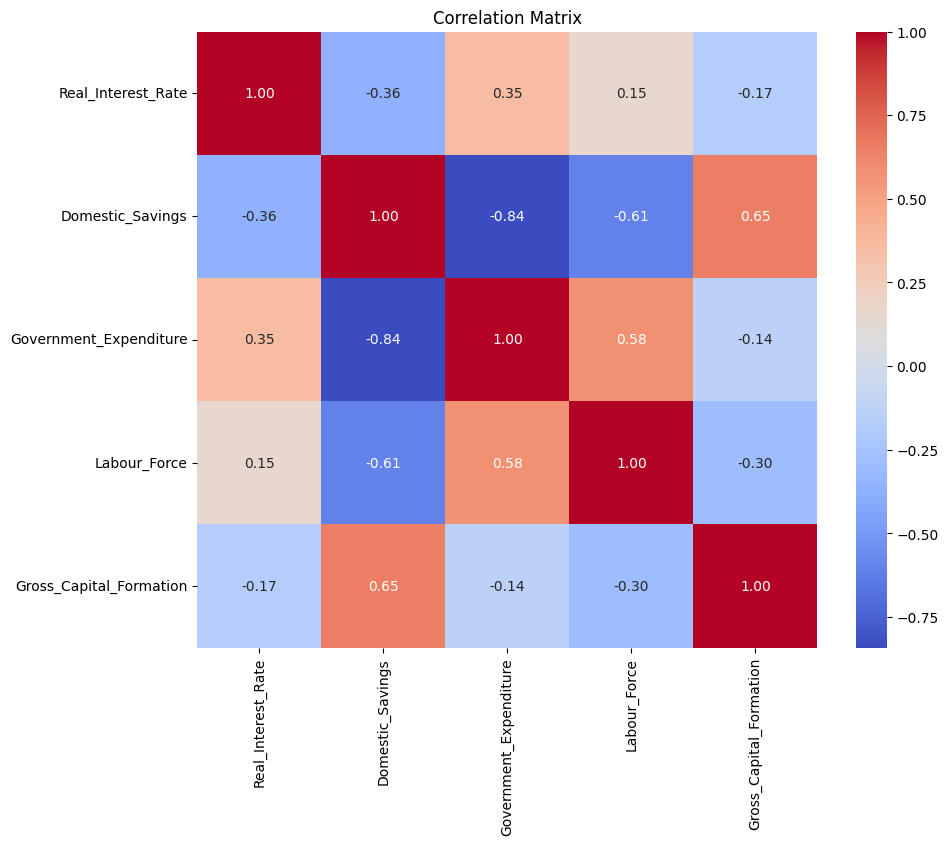

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the features excluding 'Year'
corr_matrix = df.drop('Year', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

The following insights can be derived from the correlation heatmap:

(a)Relationship Between Predictor variables and Response Variable.

1.Real Interest Rate and Gross Capital Formation

The correlation is -0.17, indicating a very weak negative relationship. This suggests that changes in the real interest rate might slightly discourage investments in capital formation, though the effect is not strong. Typically, higher interest rates reduce investment since borrowing costs are higher.

2.Domestic Savings and Gross Capital Formation

The correlation is 0.65, showing a strong positive relationship. This implies that higher domestic savings are associated with increased gross capital formation. This relationship aligns with economic theory, as higher savings provides capital for investment and growth. The strong positive correlation indicates that savings are a significant contributor to capital formation.

3.Government Expenditure and Gross Capital Formation

The correlation is -0.14, which is a weak negative relationship. This suggests that increased government expenditure does not directly translate to increased capital formation and might even slightly counteract it, possibly due to the crowding-out effect where government spending might displace private sector investment.

4.Labour Force and Gross Capital Formation

The correlation is -0.30, a weak to moderate negative relationship. This indicates that an increasing labour force is slightly negatively associated with gross capital formation. This could suggest that an expanding labour force might not be effectively employed in productivity-enhancing sectors or that increasing employment is occurring in sectors that do not significantly contribute to capital formation.

(b)Relationship between predictor variables

(i)Domestic Savings and Government Expenditure

The strong negative correlation (-0.84) could imply that when government expenditure increases (potentially reflecting higher public sector consumption or investment), it may reduce the amount of savings available in the economy, possibly due to higher taxes or increased public debt absorbing funds that could otherwise be saved by the private sector.

(ii)Labour Force and Government Expenditure

The positive correlation (0.58) might reflect that government spending possibly includes job creation programs or public sector employment, which increases the labour force. This might not directly enhance gross capital formation if such spending is oriented more towards consumption rather than investment.

Checking linearity

A linear relationship implies that the change in the response variable Y, resulting from a one-unit change in the predictor Xj,remains consistent across different values of Xj

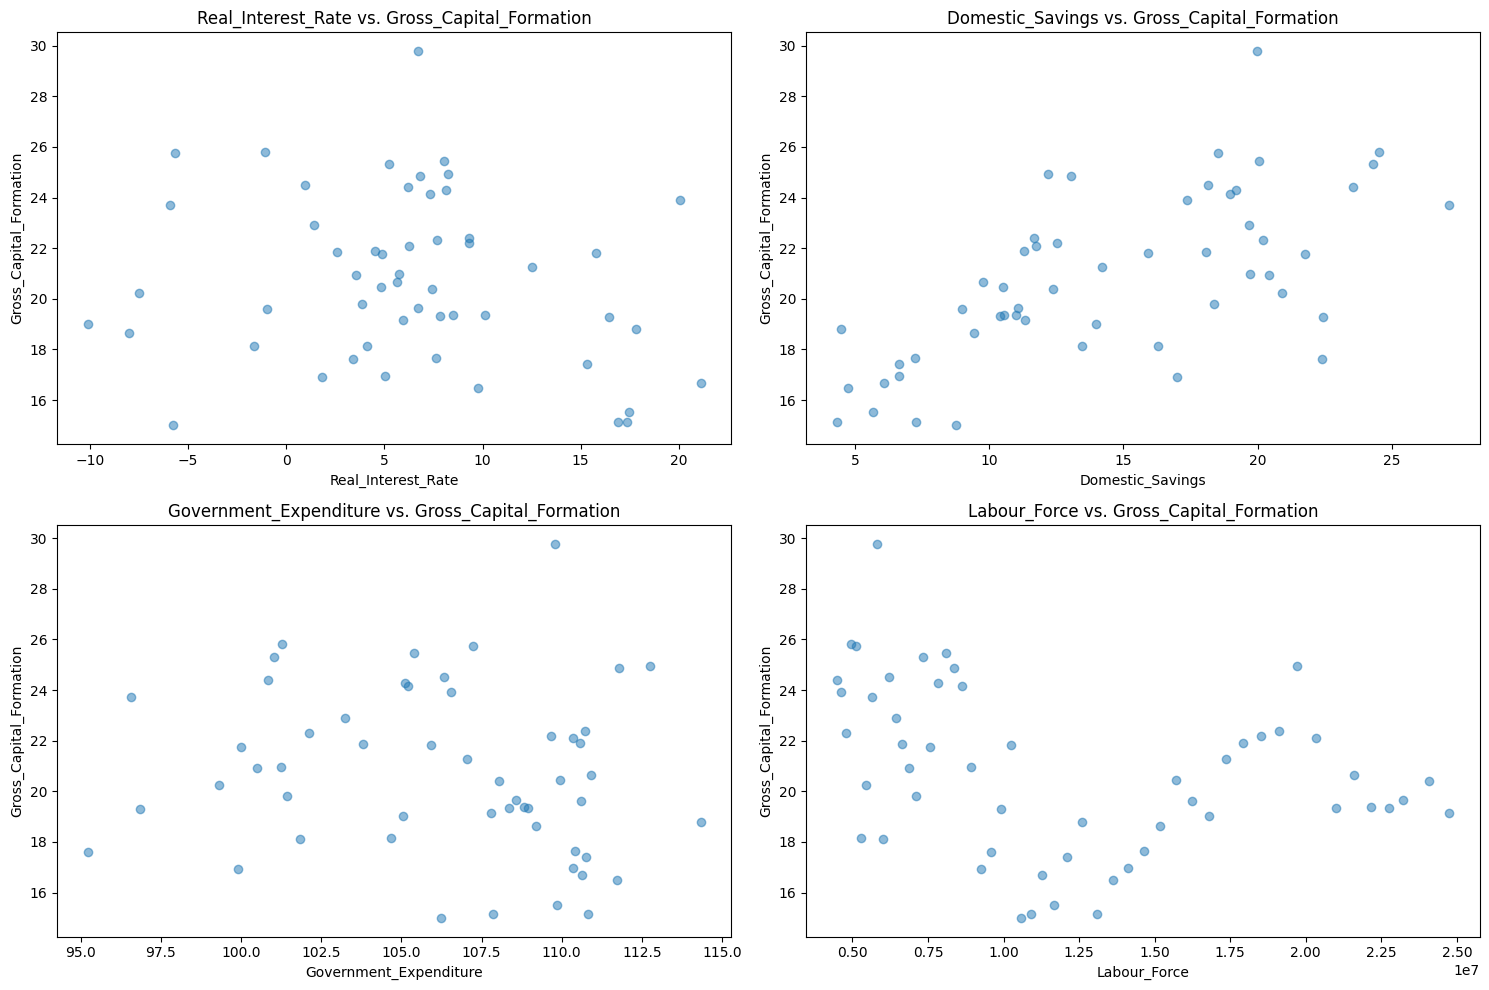

In [ ]:
# Assuming 'Gross Capital Formation' is the target variable
target = 'Gross_Capital_Formation'
features = df.drop(columns=[target, 'Year'], errors='ignore').columns

# Plot scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(len(features) // 2 + len(features) % 2, 2, i + 1)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs. {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

It appears that our variables have an approximately linear relationship. Here, a trend between each of Real Interest Rate, Domestic Savings, Government Expenditure, Labour Force, and Gross Capital Formation seems to exist.

Based on these findings, it appears that there is enough linearity present to apply a linear regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data
X = df[['Real_Interest_Rate', 'Domestic_Savings', 'Government_Expenditure', 'Labour_Force']]
y = df['Gross_Capital_Formation']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the scaler and scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and fitting Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predicting and evaluating
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Extracting the Coefficients and intercept for the equation
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# Regression equation
equation = f"Gross_Capital_Formation = {intercept:.2f} + "
equation += " + ".join([f"{coeff:.2f}*{col}" for coeff, col in zip(coefficients, X.columns)])

# Print the metrics and equation
print("Regression Equation:", equation)
print("R-Squared:", r2)
print("RMSE:", rmse)

Regression Equation: Gross_Capital_Formation = 20.45 + -0.04*Real_Interest_Rate + 4.97*Domestic_Savings + 3.71*Government_Expenditure + -0.02*Labour_Force
R-Squared: 0.9635901354083541
RMSE: 0.7485495096381861


Interpretation of Regression Equation Results

(i)Intercept (20.45): This value represents the expected value of Gross Capital Formation for the average levels of all the predictor variables.

(ii)Real Interest Rate (-0.04): This coefficient is small and negative, suggesting that an increase in the Real Interest Rate tends to slightly decrease Gross Capital Formation, holding all other factors constant.

(iii)Domestic Savings (4.97): This positive coefficient suggests a strong positive impact on Gross Capital Formation. It indicates that increases in Domestic Savings are strongly associated with increases in Gross Capital Formation, which aligns with economic theory that savings can fuel investment.

(iv)Government Expenditure (3.71):This positive coefficient suggests that increased Government Expenditure also positively affects Gross Capital Formation. This might reflect government investments contributing to overall economic growth.

(v)Labour Force (-0.02): Like the Real Interest Rate, the Labour Force has a small negative coefficient, indicating a minor negative impact on Gross Capital Formation. This suggests that increases in the Labour Force might not effectively translate into increased capital formation, perhaps due to the nature of jobs or economic productivity.

Interpretation of Model Evaluation Metrics

(i)R-Squared (0.9635901354083541): This value is very high, close to 1, indicating that about 96.36% of the variance in Gross Capital Formation is explained by the model. This suggests a strong fit to the data, where the model effectively captures the relationship between the variables and Gross Capital Formation.

(ii)RMSE (0.7485495096381861): The Root Mean Squared Error measures the average magnitude of the residuals or errors between predicted and actual observations. A lower RMSE value indicates better fit.



Checking for homoscedasticity

Homoscedasticity implies a constant variance of the residuals across different levels of the predictor variable(s), while heteroscedasticity indicates varying variances. It's essential to detect and address heteroscedasticity as it can affect the validity of statistical inference and prediction.

Fitted vs. residuals

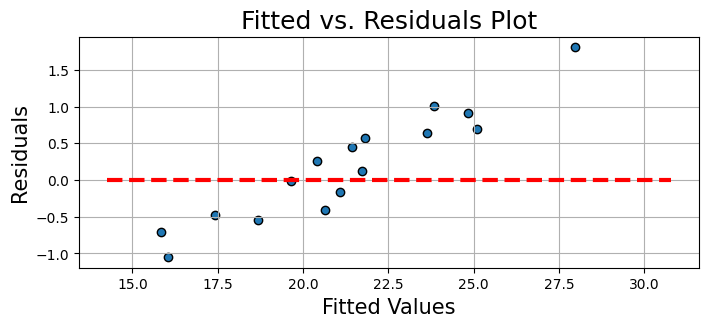

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot with red horizontal line
plt.figure(figsize=(8, 3))
plt.scatter(y_pred, residuals, edgecolor='k')
xmin = min(y_pred)
xmax = max(y_pred)
plt.hlines(y=0, xmin=xmin*0.9, xmax=xmax*1.1, color='red', linestyle='--', lw=3)
plt.xlabel("Fitted Values", fontsize=15)
plt.ylabel("Residuals", fontsize=15)
plt.title("Fitted vs. Residuals Plot", fontsize=18)
plt.grid(True)
plt.show()

Checking for normality

Here we attempt to confirm our assumption of normality amongst the residuals. If the residuals are non-normally distributed, confidence intervals can become too wide or too narrow, which leads to difficulty in estimating coefficients based on the minimisation of ordinary least squares.


1.Histogram of normalised residuals

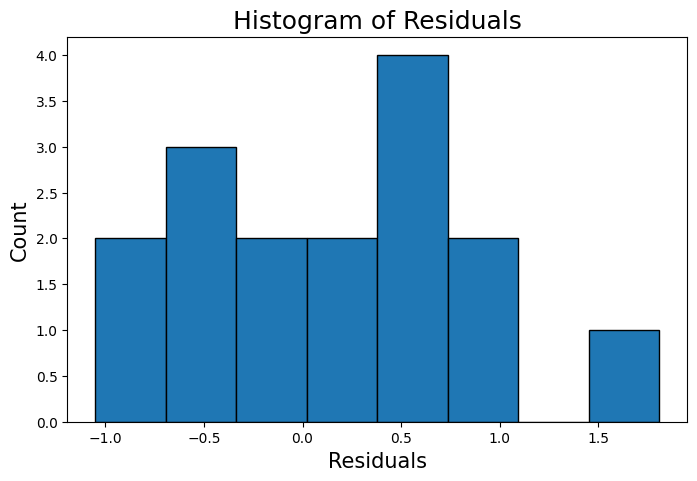

In [ ]:
# 2. Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=8, edgecolor='k')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Residuals', fontsize=15)
plt.title("Histogram of Residuals", fontsize=18)
plt.show()

Our histogram fairly resembles a bell sgape indicating normality in the residuals.

2.Q-Q plot of the residuals

<Figure size 800x500 with 0 Axes>

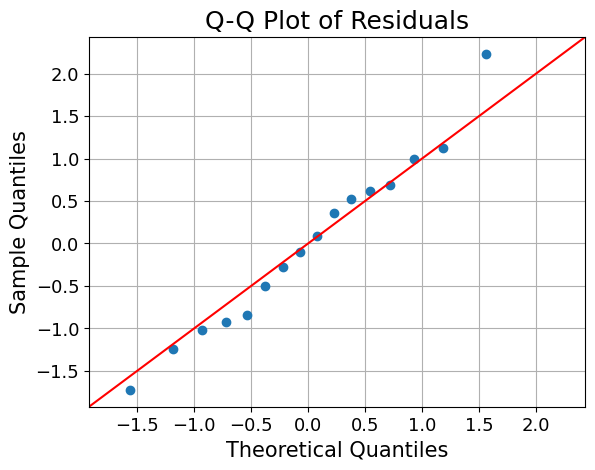

In [ ]:
# 3. Q-Q Plot of Residuals
plt.figure(figsize=(8, 5))
fig = qqplot(residuals, line='45', fit=True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Sample Quantiles", fontsize=15)
plt.title("Q-Q Plot of Residuals", fontsize=18)
plt.grid(True)
plt.show()

A Q-Q plot, short for quantile-quantile plot, compares the quantiles of the residuals against the quantiles of the theoretical standard normal distribution. In the plot, the one-to-one line (shown in red) represents perfect agreement with the theoretical distribution, indicating normality. The proximity of the plotted points to this red line indicates how closely the distribution of residuals matches the standard normal distribution. Closer alignment suggests a stronger resemblance to normality.

The residuals appear to be regularly distributed.